# Lab of computational physics - EXR05

#### Barone Francesco Pio, AY 2021/22 UniPD

## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
import pandas as pd
import numpy as np
# I will place the files for this notebook in a dedicated subdirectory
%cd ./05data

# If you didn't download it yet, please get the relevant file now!
!wget -nc -q https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt

/home/baronefr/Documents/lab_local/05data


### 1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
N = 20000 # number of rows to be red from the file

data = pd.read_csv('data_000637.txt', sep=",", nrows=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29
19996,1,0,63,3869200366,2517,6
19997,1,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


### 2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
range_bx  = data["BX_COUNTER"].max() + 1
range_tdc = data["TDC_MEAS"].max() + 1
min_orbit = data["ORBIT_CNT"].min()
range_orbit = data["ORBIT_CNT"].max()-min_orbit
print('x is', range_bx)

print(f'as a reference:\n range of BX: {range_bx}\n range of TDC: {range_tdc}')

x is 3564
as a reference:
 range of BX: 3564
 range of TDC: 30


### 3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
time_TDC = 25/30 # time (in ns) for each unit of TDC_MEAS
time_BX  = 25    # time (in ns) for each unit of BX_COUNTER

time_single_orbit = (range_bx*time_BX)*(range_tdc*time_TDC)
time_data_taking  = time_single_orbit*range_orbit
print(f'data taking is esteemed to be of {time_data_taking} ns')

data taking is esteemed to be of 443272500.0 ns


### 4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
data['abs_time'] = pd.Series( data["BX_COUNTER"]*time_BX + data["TDC_MEAS"]*time_TDC + data["ORBIT_CNT"]*time_single_orbit, index=data.index)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,8.618643e+15
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
4,1,0,64,3869200167,2760,25,8.618643e+15
...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,8.618644e+15
19996,1,0,63,3869200366,2517,6,8.618644e+15
19997,1,0,32,3869200366,2519,5,8.618644e+15
19998,1,0,17,3869200366,2522,21,8.618644e+15


### 5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
data['HEAD'] = pd.Series( np.random.randint(2, size=N), index=data.index)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,8.618643e+15
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
4,0,0,64,3869200167,2760,25,8.618643e+15
...,...,...,...,...,...,...,...
19995,0,0,27,3869200366,2513,29,8.618644e+15
19996,1,0,63,3869200366,2517,6,8.618644e+15
19997,0,0,32,3869200366,2519,5,8.618644e+15
19998,1,0,17,3869200366,2522,21,8.618644e+15


### 6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
new_df = data[data["HEAD"]==1]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,8.618643e+15
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
6,1,0,61,3869200167,2772,14,8.618643e+15
...,...,...,...,...,...,...,...
19993,1,0,42,3869200366,2392,22,8.618644e+15
19994,1,0,21,3869200366,2513,23,8.618644e+15
19996,1,0,63,3869200366,2517,6,8.618644e+15
19998,1,0,17,3869200366,2522,21,8.618644e+15


### 7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

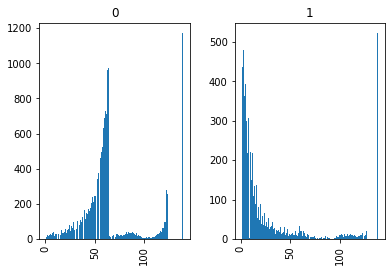

In [8]:
#(data.groupby("FPGA"))["TDC_CHANNEL"].hist(bins = 140)  # plot on the same histogram but with different colors
data.hist(column='TDC_CHANNEL', by='FPGA', bins = 140)  # separate the histograms

### 8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [9]:
pcc = data.value_counts(subset=['TDC_CHANNEL']) 
print('3 most noisy channels & nof occurrencies:',pcc[:3])

3 most noisy channels & nof occurrencies: TDC_CHANNEL
139            1693
64              996
63              969
dtype: int64


### 9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [10]:
nuo = data["ORBIT_CNT"].nunique() # number of unique orbits
print('number of unique orbits:', nuo)

nuo139 = (data[data["TDC_CHANNEL"]==139])["ORBIT_CNT"].nunique()  # nof unique orbits from channel 139
print('number of unique orbits with at least one meas from ch 139:',nuo139 )

number of unique orbits: 200
number of unique orbits with at least one meas from ch 139: 200


End of file.